In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dft=pd.read_csv('/content/drive/My Drive/IBM_sentiment_analysis/data/cleaned_vader_labelled_5days_partition/apr_21-25.csv')
dft.head()

,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
0,2020-04-21,1252627091494809600,"#day3 of #TheUltimateTravelQuiz \nAnswer, Retw...","['day3', 'TheUltimateTravelQuiz', 'TripScanner...",56.0,"{'country_code': 'in', 'state': 'Delhi', 'cit...",day theultimatetravelquiz answer retweet like ...,1
1,2020-04-21,1252627129507786753,Kudos to @Tahir_A for doing a magnificent job ...,['Staysafe'],84.0,{'country_code': 'in'},kudos magnificent job spreading fake news help...,1
2,2020-04-21,1252627153579098112,Useful video in #coronavirus pandemic: Here ar...,"['coronavirus', 'staysafe', 'coronaprecautions...",1.0,"{'country_code': 'in', 'state': 'West Bengal'...",useful video coronavirus pandemic important sa...,1
3,2020-04-21,1252627189171978240,Reaching the last mile to ensure #HealthForAll...,"['HealthForAll', 'ABHWC', 'aspirationaldistric...",71.0,{'country_code': 'in'},reaching last mile ensure healthforall anm vai...,1
4,2020-04-21,1252627270109466625,My wholehearted thanks&amp; heartfelt felt ack...,[],1987.0,"{'country_code': 'in', 'state': 'Andhra Prade...",wholehearted thanks heartfelt felt acknowledgm...,1


In [ ]:
df=dft
print(df.shape)
df.isnull().sum()
df.head()

(432849, 8)


,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
0,2020-04-21,1252627091494809600,"#day3 of #TheUltimateTravelQuiz \nAnswer, Retw...","['day3', 'TheUltimateTravelQuiz', 'TripScanner...",56.0,"{'country_code': 'in', 'state': 'Delhi', 'cit...",day theultimatetravelquiz answer retweet like ...,1
1,2020-04-21,1252627129507786753,Kudos to @Tahir_A for doing a magnificent job ...,['Staysafe'],84.0,{'country_code': 'in'},kudos magnificent job spreading fake news help...,1
2,2020-04-21,1252627153579098112,Useful video in #coronavirus pandemic: Here ar...,"['coronavirus', 'staysafe', 'coronaprecautions...",1.0,"{'country_code': 'in', 'state': 'West Bengal'...",useful video coronavirus pandemic important sa...,1
3,2020-04-21,1252627189171978240,Reaching the last mile to ensure #HealthForAll...,"['HealthForAll', 'ABHWC', 'aspirationaldistric...",71.0,{'country_code': 'in'},reaching last mile ensure healthforall anm vai...,1
4,2020-04-21,1252627270109466625,My wholehearted thanks&amp; heartfelt felt ack...,[],1987.0,"{'country_code': 'in', 'state': 'Andhra Prade...",wholehearted thanks heartfelt felt acknowledgm...,1


In [ ]:
df.tail()

,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
432844,2020-04-22,1252769631934152704,Everyday situation in Qatar getting worse. Our...,[],0.0,{'country_code': 'in'},everyday situation qatar getting worse workers...,-1
432845,2020-04-22,1252783105884082176,#IndiaFightsCorona and #FakeNews. The notice b...,"['IndiaFightsCorona', 'FakeNews']",2.0,{'country_code': 'in'},indiafightscorona fakenews notice circulated a...,0
432846,2020-04-22,1252997851161886720,"""I’m glad your government is fully utilizing i...",['AarogyaSetu'],0.0,{'country_code': 'in'},glad government fully utilizing exceptional di...,1
432847,2020-04-22,1252828840377737217,Early recognition and prompt planning to face ...,['Kerala'],3.0,"{'country_code': 'in', 'state': 'Delhi'}",early recognition prompt planning face covid p...,1
432848,2020-04-22,1252882474276798469,PM @narendramodi Ji worked as per plan - 142 C...,['ModiTheGlobalLeader'],1.0,"{'country_code': 'in', 'state': 'Delhi', 'cit...",pm ji worked per plan crore population cases m...,0


In [ ]:
print(df.shape)
df.isnull().sum()

(432849, 8)


date             0
id               0
text             0
hashtags         7
retweet_count    7
location         7
cleaned          0
sentiment        0
dtype: int64

In [ ]:
!pip install -U pywsd

Requirement already up-to-date: pywsd in /usr/local/lib/python3.6/dist-packages (1.2.4)


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text_clean=df['cleaned']

In [ ]:
text_clean=text_clean.str.replace('?','')
text_clean=text_clean.str.replace('!','')

In [ ]:
text_clean[:5]

0    day theultimatetravelquiz answer retweet like ...
1    kudos magnificent job spreading fake news help...
2    useful video coronavirus pandemic important sa...
3    reaching last mile ensure healthforall anm vai...
4    wholehearted thanks heartfelt felt acknowledgm...
Name: cleaned, dtype: object

In [ ]:
print(len(text_clean))
text_clean[0]

432849


'day theultimatetravelquiz answer retweet like page win exciting prices identify country picture tripscanners quiz quiztime contestalert quizzes answerthequestion tripofalifetime quiztime lockdown travel travelling trips lockdown'

In [ ]:
from pywsd.utils import lemmatize_sentence
t_clean=[lemmatize_sentence(s) for s in text_clean]

Warming up PyWSD (takes ~10 secs)... took 5.70068097114563 secs.


In [ ]:
t_clean[0]

['day',
 'theultimatetravelquiz',
 'answer',
 'retweet',
 'like',
 'page',
 'win',
 'excite',
 'price',
 'identify',
 'country',
 'picture',
 'tripscanners',
 'quiz',
 'quiztime',
 'contestalert',
 'quizzes',
 'answerthequestion',
 'tripofalifetime',
 'quiztime',
 'lockdown',
 'travel',
 'travel',
 'trip',
 'lockdown']

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
from itertools import chain
words=list(chain.from_iterable(t_clean))


In [ ]:
print(words[0])

day


In [ ]:
string=' '.join(words)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10,stopwords=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel']).generate(string)

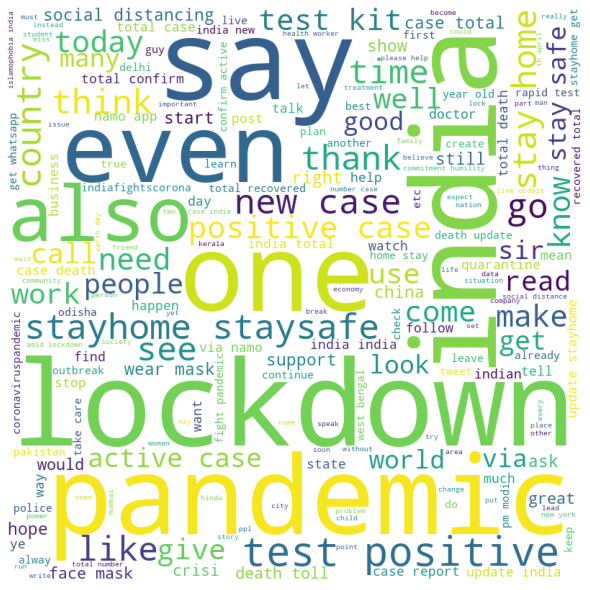

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
f_clean=[]
for l in t_clean:
  s=' '.join(l)
  f_clean.append(s)

In [ ]:
f_clean[:5]

['day theultimatetravelquiz answer retweet like page win excite price identify country picture tripscanners quiz quiztime contestalert quizzes answerthequestion tripofalifetime quiztime lockdown travel travel trip lockdown',
 'kudos magnificent job spread fake news help terrorist kashmir power staysafe',
 'useful video coronavirus pandemic important safety precaution doctor nurse staysafe coronaprecautions coronanews doctorstrange doctor hospital coronatips covid coronago lockdown lockdownextension lockdownchallenge',
 'reach last mile ensure healthforall anm vaijanti abhwc sukhipali one remote area aspirationaldistrict mahasumund chhattisgarh vaccination awareness generation amidst covid lockdown',
 'wholehearted thanks heartfelt felt acknowledgment amudalavalasa jsp leader sri pedada rammohan garu distribute essential people need']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(2,3),stop_words=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel'])
tf = tf_vectorizer.fit_transform(f_clean)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
tf_feature_names

['aarogya setu',
 'aarogya setu app',
 'across country',
 'across globe',
 'across india',
 'across world',
 'action take',
 'active case',
 'active case cure',
 'active case total',
 'advisor mo',
 'advisor mo hfw',
 'advocate green',
 'advocate green justrecovery',
 'affect individual',
 'air pollution',
 'allah bless',
 'allah mean',
 'allah mean compromise',
 'allow open',
 'amid crisis',
 'amid lockdown',
 'amid outbreak',
 'amid pandemic',
 'amidst lockdown',
 'amidst pandemic',
 'andhra pradesh',
 'antibody test',
 'approval rating',
 'april pm',
 'april th',
 'arnab goswami',
 'around world',
 'ask question',
 'attribute perfection',
 'attribute perfection knowledge',
 'ayushmanbharatlootyogana due',
 'ayushmanbharatlootyogana due china',
 'baap hai',
 'baap hai indiacheakmateschina',
 'back home',
 'back normal',
 'banevm moditrump',
 'banevm moditrump covided',
 'bank account',
 'bbc news',
 'become first',
 'become free',
 'begin human',
 'begin human trial',
 'bengal govt',

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
  s=''
  for topic_idx, topic in enumerate(model.components_):
    s=s+("Topic %d:" % (topic_idx))
    s=s+(",".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))
    s=s+'\n'
  return s

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

'Topic 0:namo app,via namo,via namo app,social distance,th april,fight pandemic,holy month,pm modi,team india,level lockdown\nTopic 1:total case,case death,medium advisor,case india,pandemic situation,doctor nurse,fight one,recovery rate,stay united,god bless\nTopic 2:year old,please help,modi govt,save life,fake news,social medium,around world,people die,healthcare worker,global pandemic\nTopic 3:stay home,stay safe,update india,total death,case total,india total,total confirm,active case,update stayhome,total recovered\nTopic 4:stayhome staysafe,china mncs,boycott china mncs,test kit,china mncs boycott,mncs boycott,mncs boycott china,time india,rapid test,case rise\nTopic 5:boycott china,commitment humility,medium advisor mo,urs medium advisor,urs medium,mo hfw,advisor mo hfw,advisor mo,mo hfw govt,hfw govt\nTopic 6:test positive,wear mask,take care,may allah,live update,prime minister,health minister,critical situation,would like,month ramadan\nTopic 7:death toll,face mask,number ca

In [ ]:
lda.perplexity(tf)

472.4772499494477

In [ ]:
f=open('lda_apr_21-25.pk','wb')
import pickle
pickle.dump(lda, f)
f.close()

In [ ]:
f = open("topics_apr_21-25.txt", "w")
f.write(display_topics(lda, tf_feature_names, no_top_words))
f.close()

In [ ]:
import shutil
shutil.move('lda_apr_21-25.pk','/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/saved_models/lda_apr_21-25.pk')
shutil.move("topics_apr_21-25.txt",'/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/topics_text_files/topics_apr_21-25.txt')